In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [59]:
df = pd.read_csv('Property_Price_Train.csv')
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
print(df.shape)

(1459, 81)


df.describe()

In [62]:
df.dtypes

Id                  int64
Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size            int64
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price          int64
Length: 81, dtype: object

### Check for missing/null values ###

Need to deep dive into analysis NaN value of each column.

In [67]:
print(df.isnull().sum())

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64


<Axes: >

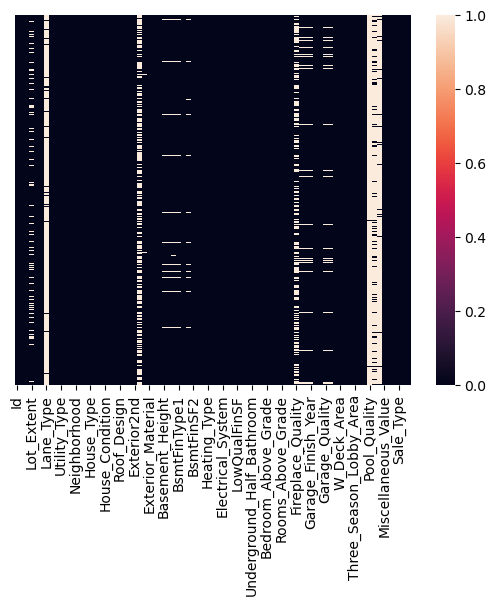

In [68]:
sns.heatmap(df.isnull(),yticklabels=False)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [71]:
# drop columns which has more than 50% null value
#  fill object value by mode, intiger and float value by mean
def null_check():
    for i in df.columns:
        if ((df[i].isnull().sum()*100/len(df[i]))>50):
            df.drop([i],axis=1,inplace=True)
        elif(df[i].dtypes=='object'):
            df[i]=df[i].fillna(df[i].mode()[0])
        elif(df[i].dtypes=='int'):
            df[i]=df[i].fillna(df[i].mean())
        elif(df[i].dtypes=='float'):
            df[i]=df[i].fillna(df[i].mean())

null_check()

In [72]:
sum(df.isnull().any())

0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1459 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Property_Shape             1459 non-null   object 
 7   Land_Outline               1459 non-null   object 
 8   Utility_Type               1459 non-null   object 
 9   Lot_Configuration          1459 non-null   object 
 10  Property_Slope             1459 non-null   object 
 11  Neighborhood               1459 non-null   object 
 12  Condition1                 1459 non-null   object 
 13  Condition2                 1459 non-null   objec

<Axes: >

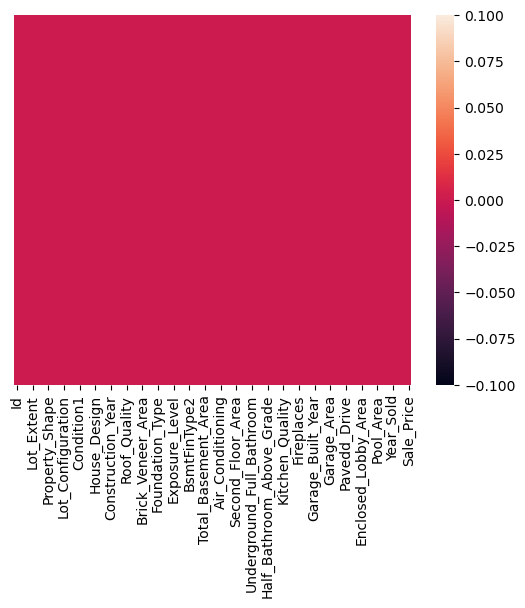

In [74]:
sns.heatmap(df.isnull(),yticklabels=False)

### Encoding data ###

In [75]:
df.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom

In [76]:
#encode object data type
from sklearn.preprocessing import LabelEncoder
def encod():
    for i in df.columns:
        if(df[i].dtypes=='object'):
            df[i]=LabelEncoder().fit_transform(df[i])
encod()

In [77]:
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,3,3,0,4,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   int64  
 3   Lot_Extent                 1459 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   int64  
 6   Property_Shape             1459 non-null   int64  
 7   Land_Outline               1459 non-null   int64  
 8   Utility_Type               1459 non-null   int64  
 9   Lot_Configuration          1459 non-null   int64  
 10  Property_Slope             1459 non-null   int64  
 11  Neighborhood               1459 non-null   int64  
 12  Condition1                 1459 non-null   int64  
 13  Condition2                 1459 non-null   int64

### Check duplicate ###

In [79]:
df.duplicated().sum()

0

### Outlier handling ###

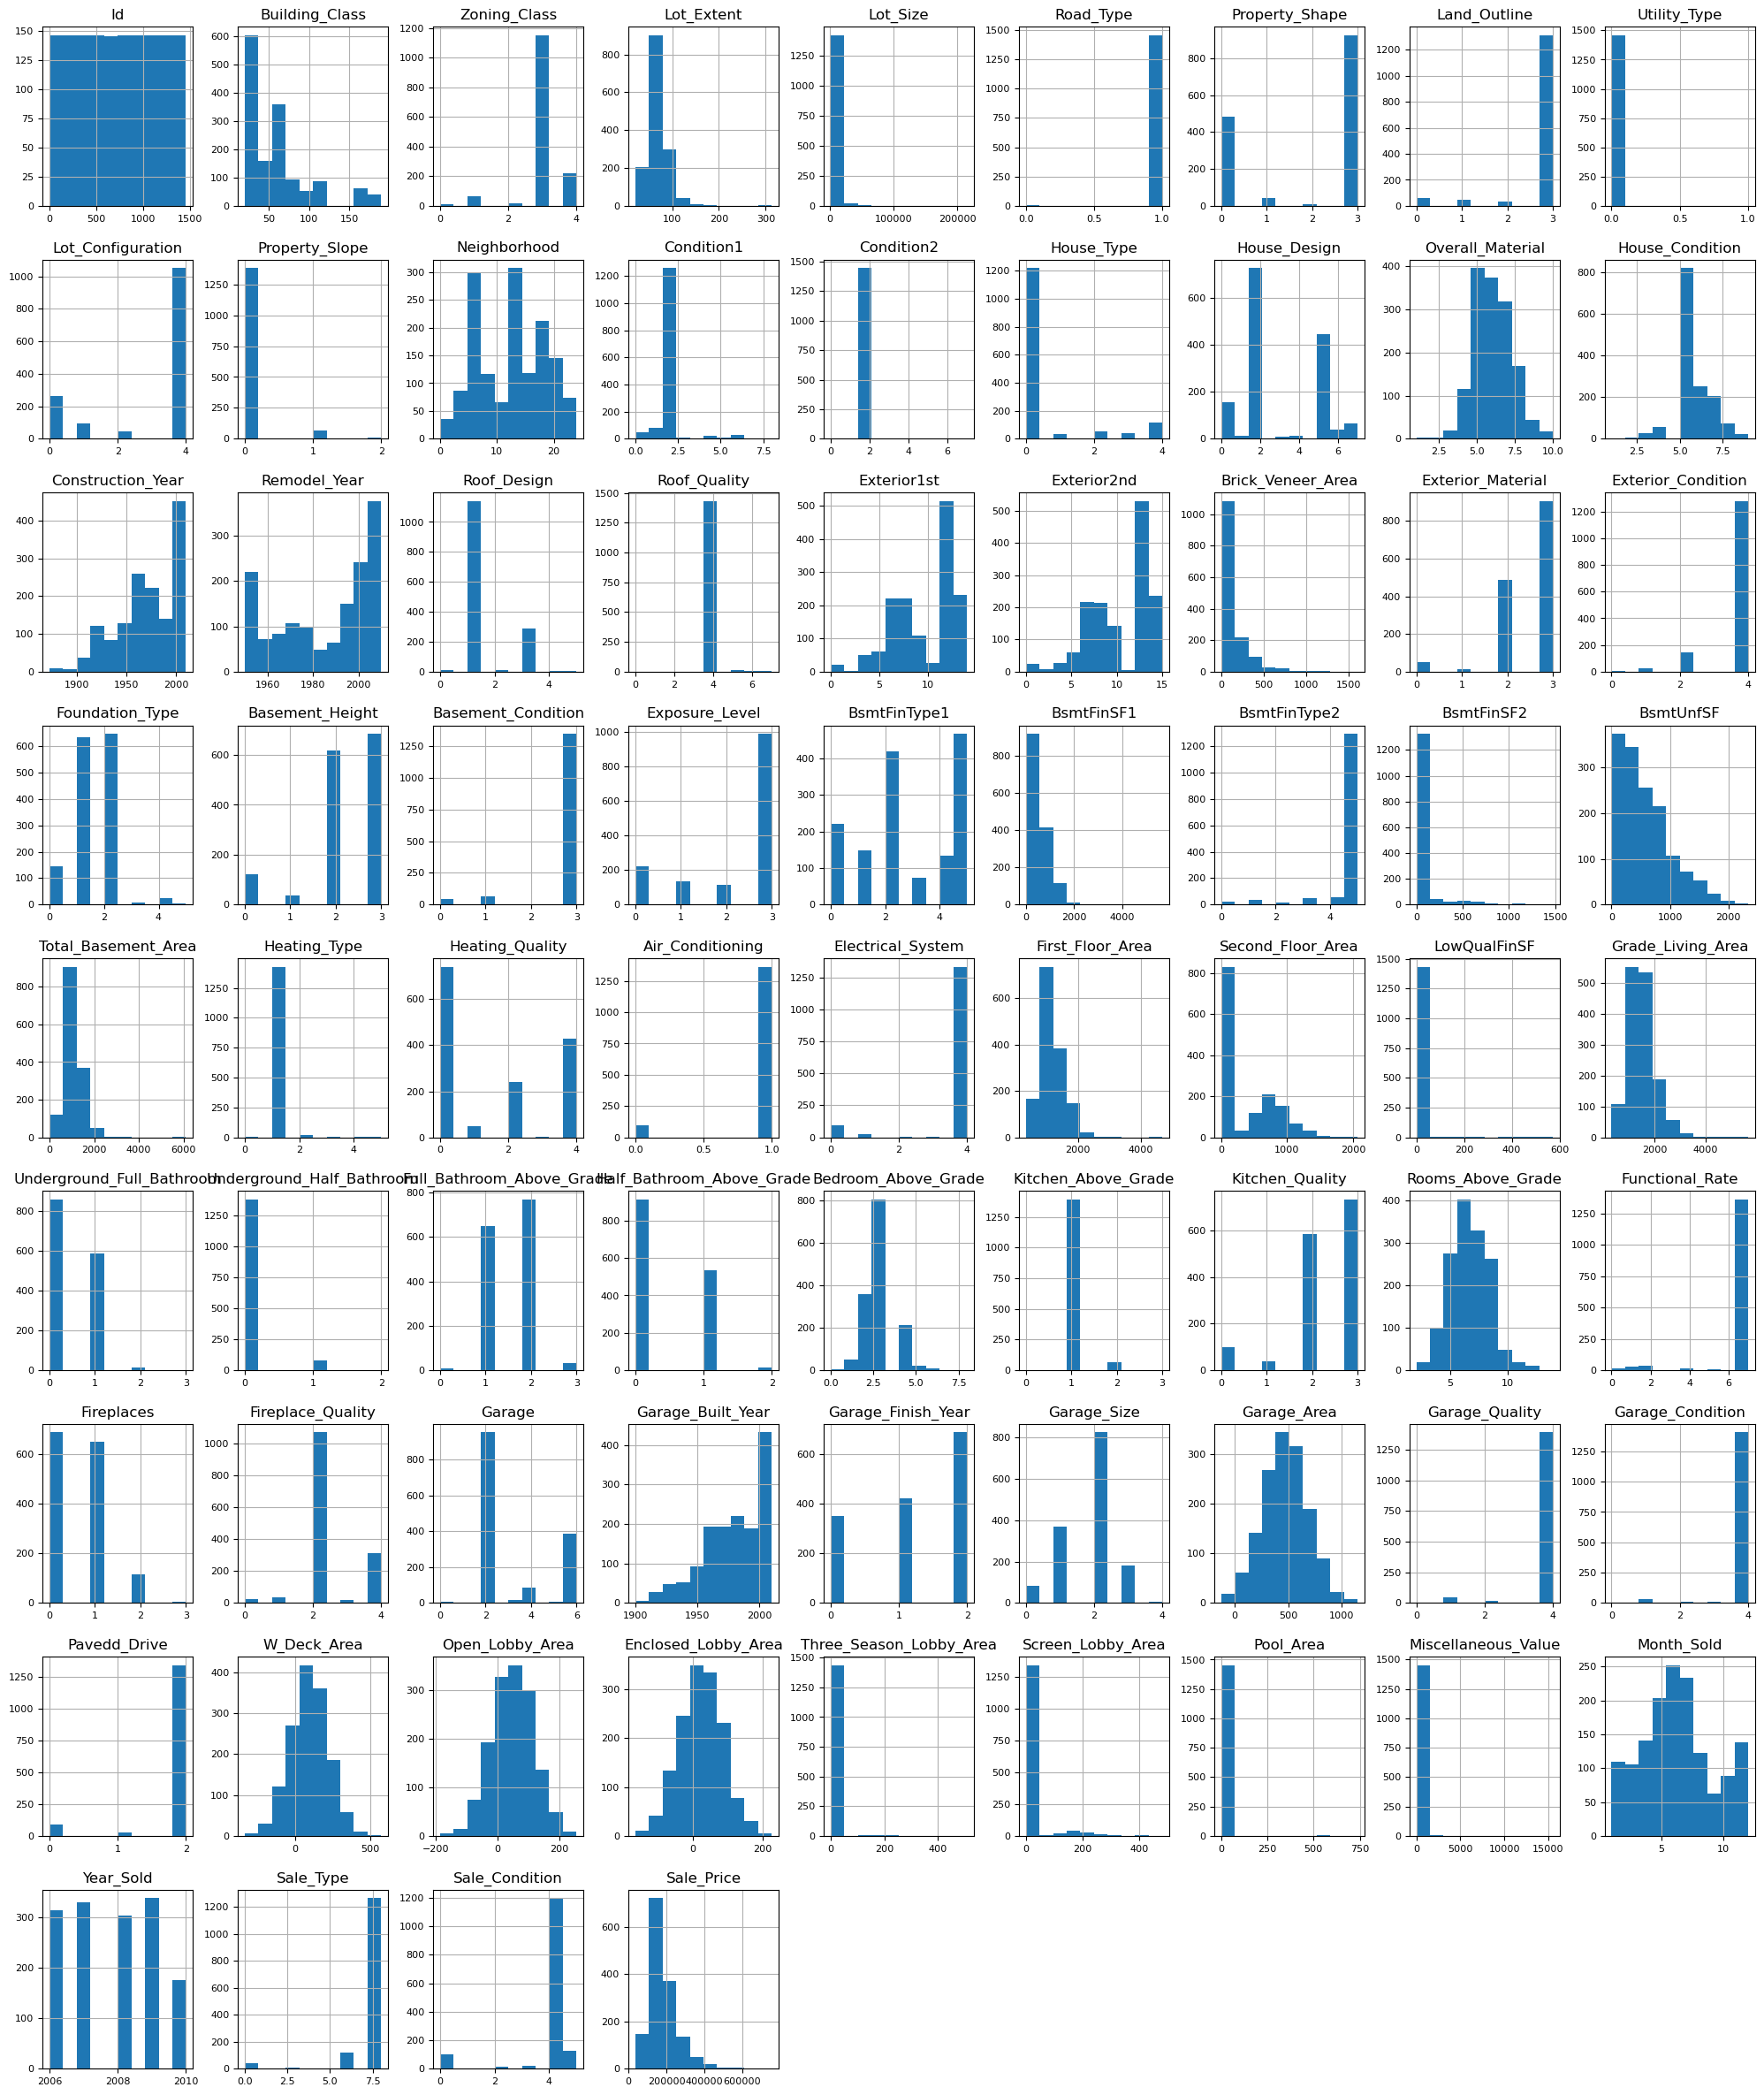

In [80]:
df.hist(figsize=(25, 30), xlabelsize=8, ylabelsize=8)
plt.show()

In [88]:
# Remove column Id since it's skewness is 0 (not required)

# Already removed, that's why error is coming

df.drop(['Id'], axis=1)

KeyError: "['Id'] not found in axis"

In [89]:
#if skewness = 0 then data is normal distributed
for i in df.columns:
    print(i + ': ' + str(df[i].skew()))

Building_Class: 1.4069376135926246
Zoning_Class: -1.7348995078410714
Lot_Extent: 2.3848135636290757
Lot_Size: 12.203437959391616
Road_Type: -15.513398728016105
Property_Shape: -0.60906489024953
Land_Outline: -3.161114142460053
Utility_Type: 38.19685850956858
Lot_Configuration: -1.1345778135587943
Property_Slope: 4.811832515107521
Neighborhood: 0.04079954275146021
Condition1: 3.0180932761213635
Condition2: 13.167289910997495
House_Type: 2.244472321983797
House_Design: 0.30573458186287955
Overall_Material: 0.21571915894120147
House_Condition: 0.6936817670300427
Construction_Year: -0.6136996752141196
Remodel_Year: -0.5052391316478888
Roof_Design: 1.4727285833371901
Roof_Quality: 3.316534635331407
Exterior1st: -0.7283597357166011
Exterior2nd: -0.6950567049911548
Brick_Veneer_Area: 2.6753461546145734
Exterior_Material: -1.8320568637218713
Exterior_Condition: -2.564061320402076
Foundation_Type: 0.413799317496644
Basement_Height: -1.343470183882859
Basement_Condition: -3.4550407718278957
Expo

In [90]:
#make function for outlier detection 

def outlier_detection(df):
    for i in df.columns:
        if(df[i].skew()==0.00): #if skewness == 0 then it is normal distributed
            mean=np.mean(df[i]) #apply z score formula 
            std=np.std(df[i])
            for y in df[i]:
                z=(y-mean)/std
                if z>3 or z<-3:
                    df=df[df[i]!=y]
                return df
        else:
            q1=df[i].quantile(q=0.25) #if not normal distributed apply iqr 
            q3=df[i].quantile(q=0.75)
            iqr=q1-q3
            lower_bond=q1-(1.5*iqr)
            upper_bond=q3+(1.5*iqr)
            for j in df[i]:
                if(j<lower_bond or j>upper_bond):
                    df=df[df[i]!=j]
                return df

#make object for outlier function
df=outlier_detection(df)

In [91]:
df.shape

(1160, 75)

In [92]:
df.describe()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,...,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,56.129310,3.078448,67.862680,10120.057759,0.994828,2.075862,2.752586,0.000862,3.065517,0.066379,...,24.774616,3.416379,14.591379,2.132759,50.012069,6.281897,2007.837931,7.474138,3.711207,165735.210345
std,47.415704,0.640764,21.443092,10679.883809,0.071764,1.368739,0.750031,0.029361,1.602689,0.284620,...,60.864597,30.040523,54.005994,36.607561,552.225020,2.700912,1.330446,1.686168,1.154297,69904.823928
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7098.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,-16.197418,0.000000,0.000000,0.000000,0.000000,4.750000,2007.000000,8.000000,4.000000,124000.000000
50%,30.000000,3.000000,70.000000,9091.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,24.377445,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,147000.000000
75%,80.000000,3.000000,76.000000,11249.250000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,65.941914,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,189000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,611657.000000


### Feature scaling ###

In [27]:
# scaling fetaures 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_data1=std.fit_transform(df.drop(['Sale_Price'],axis=1))

In [28]:
std_data1

array([[-0.76229793, -0.12248199,  0.56626888, ..., -0.63008367,
         0.31200271,  0.25029744],
       [ 0.29265984, -0.12248199, -0.36683474, ..., -1.38203538,
         0.31200271, -3.21650885],
       [-0.12932327, -0.12248199,  0.79954478, ...,  0.87381974,
         0.31200271,  0.25029744],
       ...,
       [-0.76229793, -0.12248199,  0.79954478, ...,  1.62577145,
         0.31200271,  0.25029744],
       [ 0.29265984, -0.12248199, -0.08690365, ...,  1.62577145,
         0.31200271,  0.25029744],
       [-0.76229793, -0.12248199,  0.00640671, ...,  1.62577145,
         0.31200271,  0.25029744]])

### Exploratory data analysis ###

We believe Sale_Price is the target of prediction, so we can analyse it.

In [94]:
df['Sale_Price'].describe()

count      1160.000000
mean     165735.210345
std       69904.823928
min       34900.000000
25%      124000.000000
50%      147000.000000
75%      189000.000000
max      611657.000000
Name: Sale_Price, dtype: float64

In [96]:
df['Sale_Price'].skew()

1.7402045322677087

Visualizing the Sale_Price distribution of the dataset

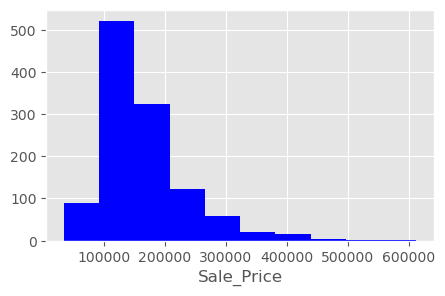

In [99]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (5, 3)
plt.hist(df['Sale_Price'], color='blue')
plt.xlabel('Sale_Price')
plt.show()

Matrix heatmap to help to indentify correlation between the target and other features

<Axes: >

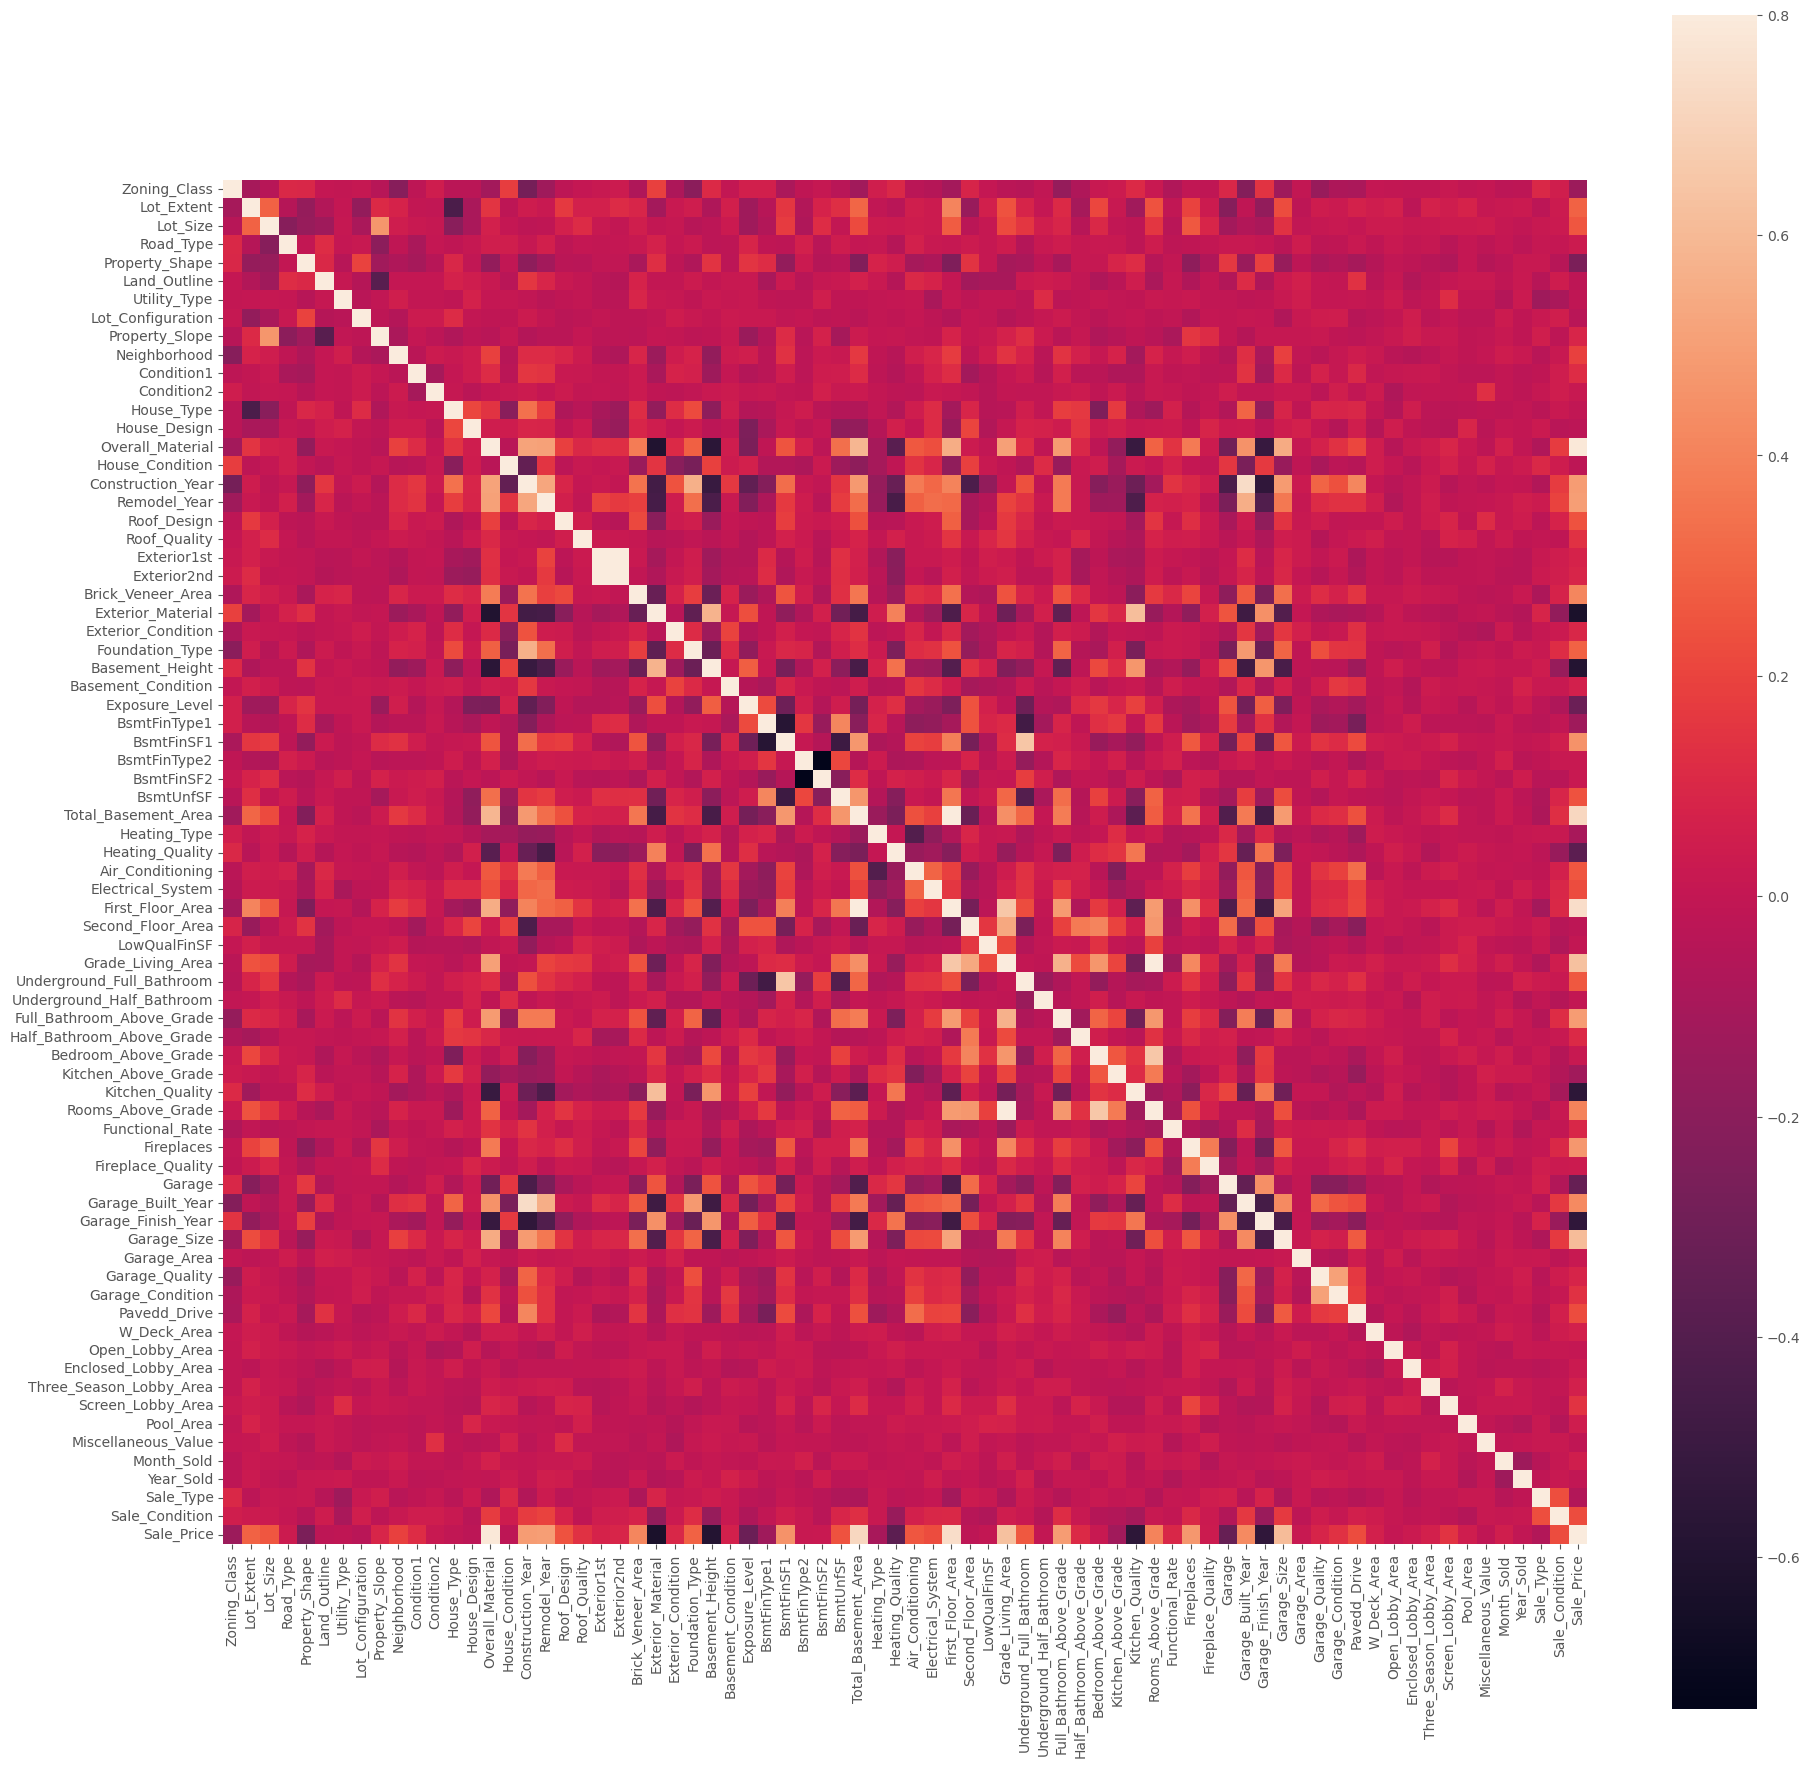

In [101]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [102]:
# Correlation between attributes with Sale_Price

corr_list = corr['Sale_Price'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

Overall_Material       0.786360
First_Floor_Area       0.743929
Total_Basement_Area    0.720352
Grade_Living_Area      0.628921
Garage_Size            0.608130
                         ...   
Heating_Quality       -0.369997
Garage_Finish_Year    -0.542236
Kitchen_Quality       -0.553525
Basement_Height       -0.589749
Exterior_Material     -0.627288
Name: Sale_Price, Length: 73, dtype: float64

Visualizing top 6 related attributes to the target

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/a

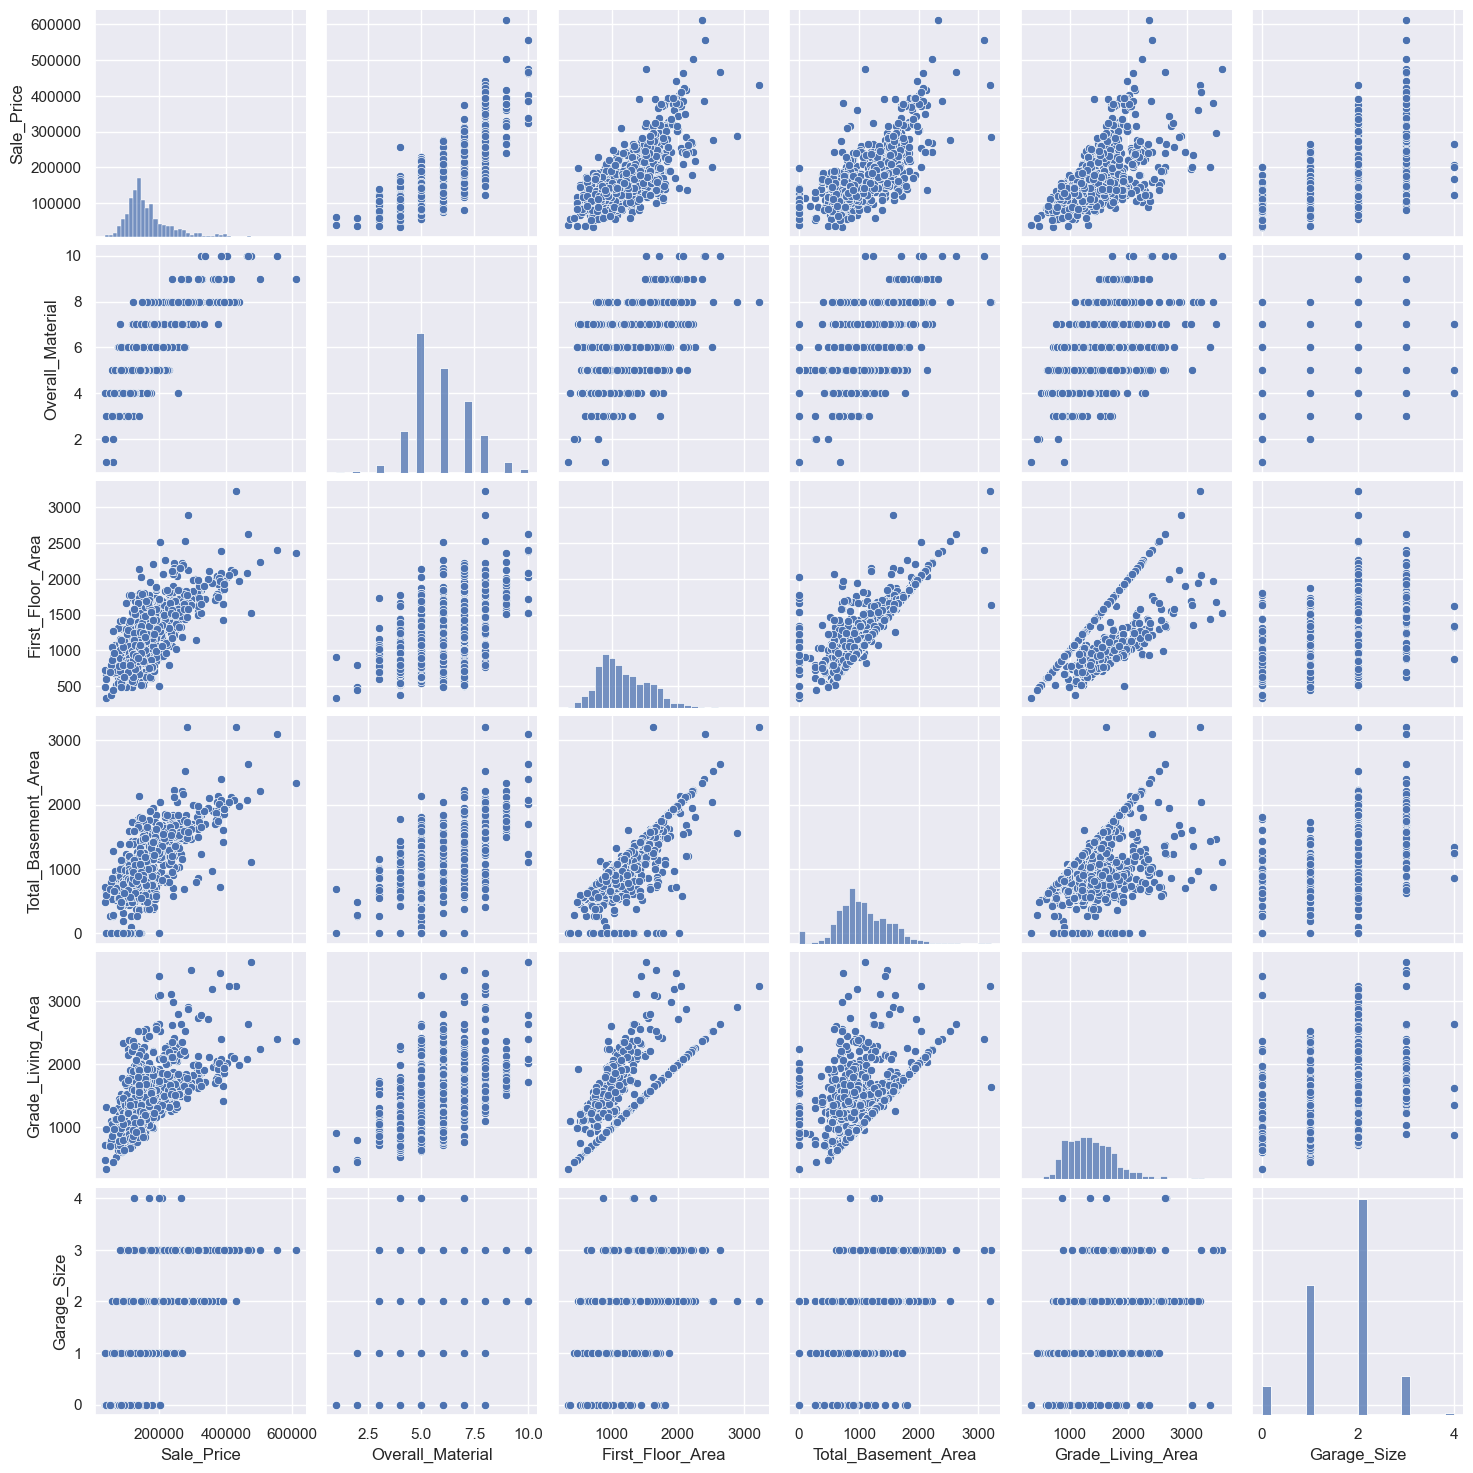

In [107]:
# Scatter plotting the variables most correlated with SalePrice
cols = corr.nlargest(6, 'Sale_Price')['Sale_Price'].index
sns.set()
sns.pairplot(df[cols], size=2.5)
plt.show()